In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Data/visualizedData.csv')

In [220]:
KagTestData=pd.read_csv('Data/visualizedTestData.csv')

In [198]:
ansID=pd.read_csv('Data/ansID.csv')

In [3]:
print('Data Shape',data.shape)

Data Shape (1451, 136)


In [4]:
x=data.drop(columns=['SalePrice'],axis=1)
y=data.SalePrice
y=np.log(y)
print('xShape=',x.shape)
print('yShape=',y.shape)

xShape= (1451, 135)
yShape= (1451,)


In [5]:
def makegraph(yTest,yPred,title):
    sns.regplot(yTest,yPred)
    plt.xlabel('yTest')
    plt.ylabel('yPred')
    plt.title(title)
    plt.show()

## 1. Linear Model

In [6]:
def linearregression(xTrain,xTest,yTrain,yTest):
    from sklearn import linear_model
    from sklearn.metrics import mean_squared_error
    lm=linear_model.LinearRegression()
    model=lm.fit(xTrain,yTrain)
    
    #r^2 score
    print('r^2 score =',model.score(xTest,yTest))
    
    #RMSE
    yPred=model.predict(xTest)
    print('Rmse value=',np.sqrt(mean_squared_error(yTest,yPred)))
    
    #Graph
    makegraph(yTest,yPred,'Linear Regression')

## 2. Ridge Regression

In [7]:
def ridgeregression(xTrain,xTest,yTrain,yTest):    
    from sklearn import linear_model
    from sklearn.metrics import mean_squared_error
    for i in range (-3,4):
        alpha=10**i
        rm=linear_model.Ridge(alpha=alpha)
        ridge_model=rm.fit(xTrain,yTrain)
        yPred=ridge_model.predict(xTest)

        print('RMSE =',np.sqrt(mean_squared_error(yTest,yPred)))
        print('r^2  =',ridge_model.score(xTest,yTest))
        
        t1='Ridge Regression for alpha='
        t2=str(alpha)
        makegraph(yTest,yPred,t1+t2)
        
        print('\n\n')

## 3. Lasso Regression

In [8]:
def lassoregression(xTrain,xTest,yTrain,yTest):
    from sklearn import linear_model
    from sklearn.metrics import mean_squared_error
    for i in range(-3,4):
        alpha=10**i
        lm=linear_model.Lasso(alpha=alpha)
        lasso_model=lm.fit(xTrain,yTrain)
        yPred=lasso_model.predict(xTest)

        print('RMSE = ',np.sqrt(mean_squared_error(yTest,yPred)))
        print('r^2 score=',lasso_model.score(xTest,yTest))
        
        makegraph(yTest,yPred,'Lasso Regression for alpha='+str(alpha))

# 1. Train_test_split()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xTrain,xTest,yTrain,yTest=train_test_split(x,y,random_state=32,test_size=0.25)

In [11]:
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(1088, 135)
(363, 135)
(1088,)
(363,)


r^2 score = 0.9103185892503142
Rmse value= 0.12357012343824604


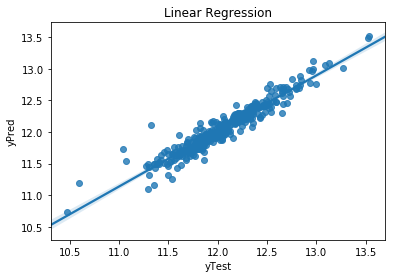

In [12]:
linearregression(xTrain,xTest,yTrain,yTest)

RMSE = 0.1235694667381252
r^2  = 0.9103195424521908


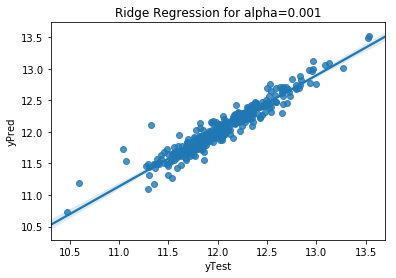




RMSE = 0.12356419626169468
r^2  = 0.9103271923785093


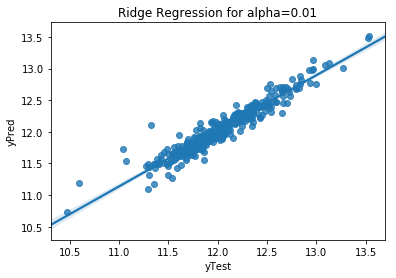




RMSE = 0.12356040308078105
r^2  = 0.9103326978561758


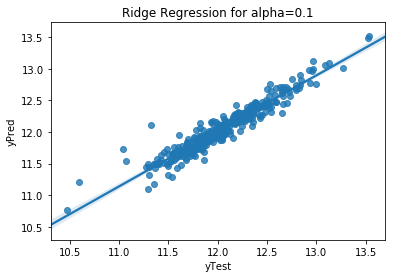




RMSE = 0.1246536067726495
r^2  = 0.9087390115144853


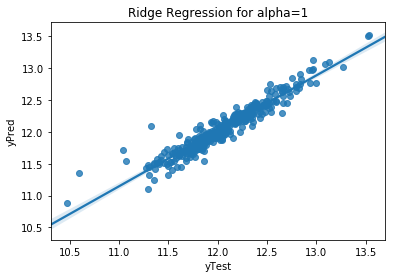




RMSE = 0.12748073880853536
r^2  = 0.9045524876489808


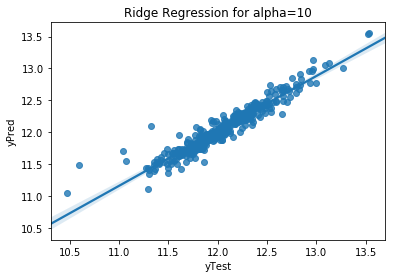




RMSE = 0.12986430069993474
r^2  = 0.9009498738761


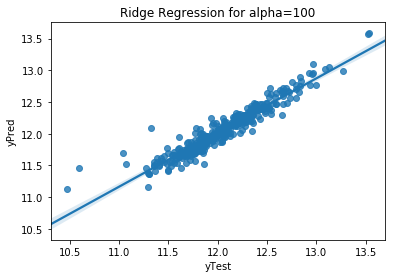




RMSE = 0.14117933907254177
r^2  = 0.8829375095670914


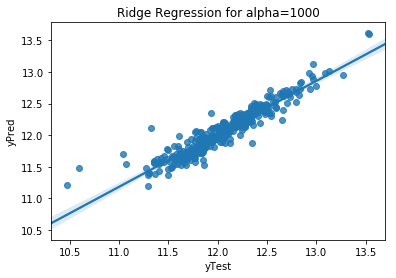

In [13]:
ridgeregression(xTrain,xTest,yTrain,yTest)

RMSE =  0.1269302867476368
r^2 score= 0.9053749781691819


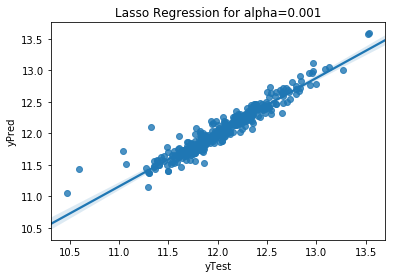

RMSE =  0.13886358466845963
r^2 score= 0.8867463481885665


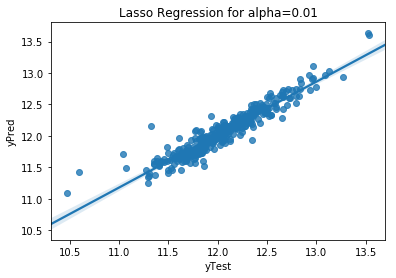

RMSE =  0.1659412799539753
r^2 score= 0.8382723255863839


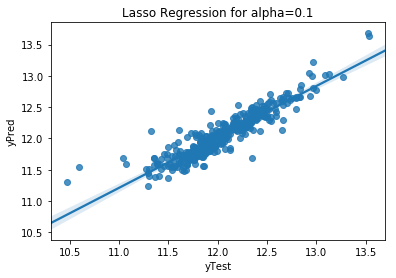

RMSE =  0.183573836177765
r^2 score= 0.8020766480118607


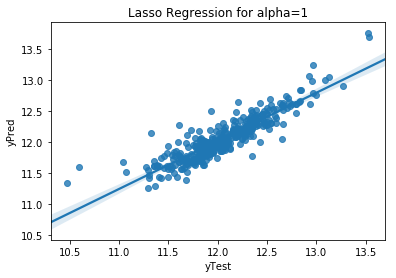

RMSE =  0.2179623498415093
r^2 score= 0.7209780091631339


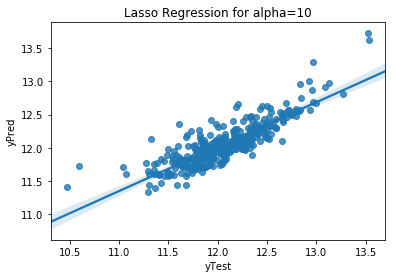

RMSE =  0.3559328156502186
r^2 score= 0.25593387885779284


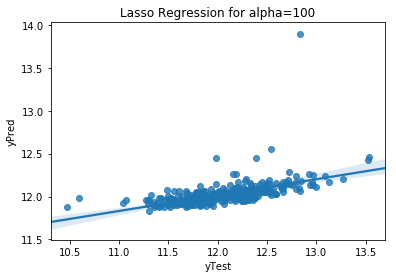

RMSE =  0.41423274933789767
r^2 score= -0.0077767461545350525


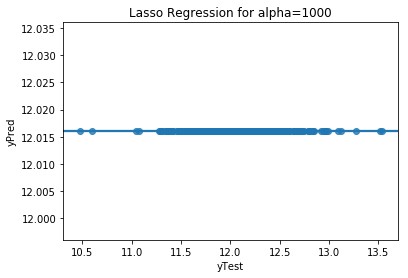

In [14]:
lassoregression(xTrain,xTest,yTrain,yTest)

# 2. Cross Validiation

In [15]:
from sklearn.model_selection import KFold

In [16]:
kf=KFold(n_splits=5,shuffle=True)

In [17]:
xData,xUnseenData,yData,yUnseenData=train_test_split(x,y,random_state=27,test_size=0.25)

r^2 score = 0.8924699564144947
Rmse value= 0.13664608595937486


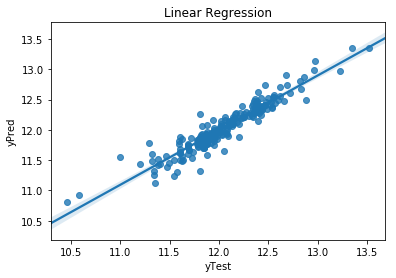

r^2 score = 0.8602662094889345
Rmse value= 0.14959813281264825


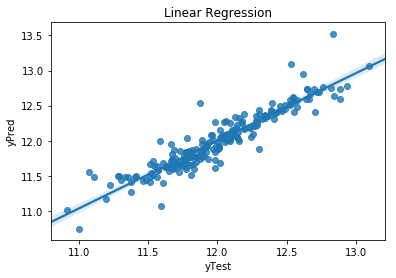

r^2 score = 0.9174984379842138
Rmse value= 0.12043574370695333


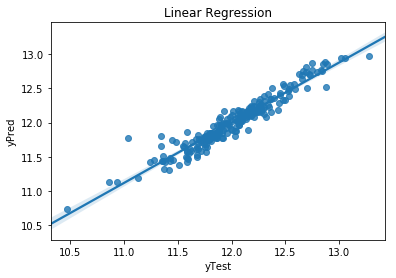

r^2 score = 0.8602290431902662
Rmse value= 0.14911308953391478


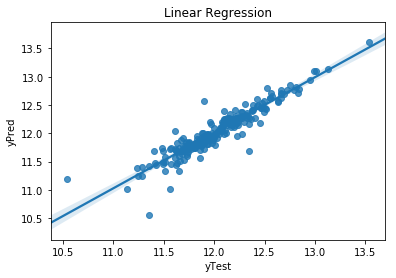

r^2 score = 0.8878726576252193
Rmse value= 0.13219567068462085


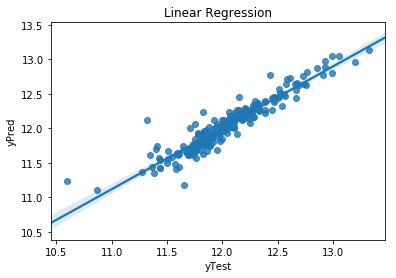

In [18]:
#Linear Regression
for train_index, test_index in kf.split(xData):
    xTrain=xData.iloc[train_index]
    xTest=xData.iloc[test_index]
    yTrain=yData.iloc[train_index]
    yTest=yData.iloc[test_index]
    linearregression(xTrain,xTest,yTrain,yTest)

Cycle Number: 1
RMSE = 0.14197187049129276
r^2  = 0.8895014411502657


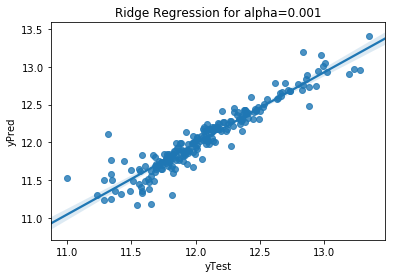




RMSE = 0.14166831568498764
r^2  = 0.8899734573247711


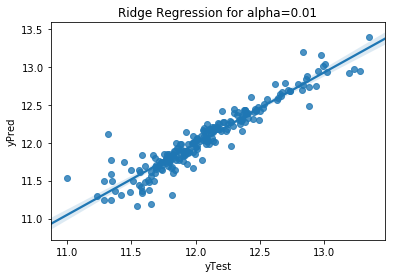




RMSE = 0.14015561999157738
r^2  = 0.8923105796899049


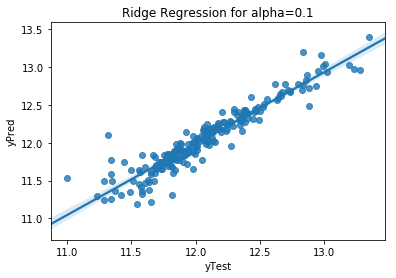




RMSE = 0.13784287614052362
r^2  = 0.895835278297176


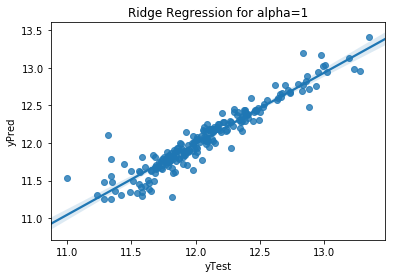




RMSE = 0.13654858335579775
r^2  = 0.8977822297621599


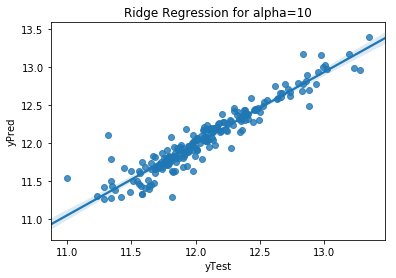




RMSE = 0.13548117045424016
r^2  = 0.8993740750698472


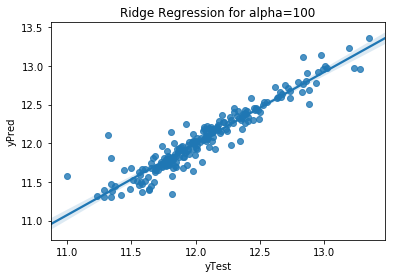




RMSE = 0.14753046774945966
r^2  = 0.8806793957172537


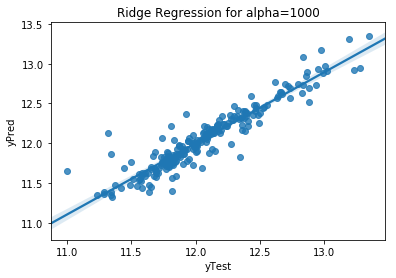




Cycle Number: 2
RMSE = 0.14058086138366416
r^2  = 0.8821183400919922


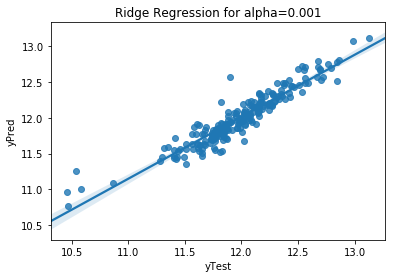




RMSE = 0.14043153846983858
r^2  = 0.8823686314083037


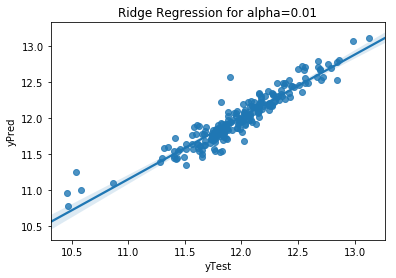




RMSE = 0.13976374208769168
r^2  = 0.8834847201322255


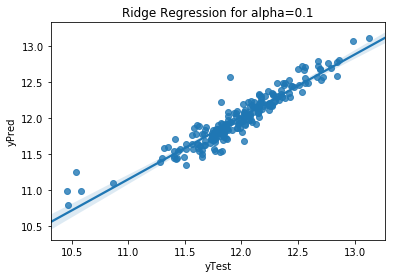




RMSE = 0.1400222772571406
r^2  = 0.8830532611825282


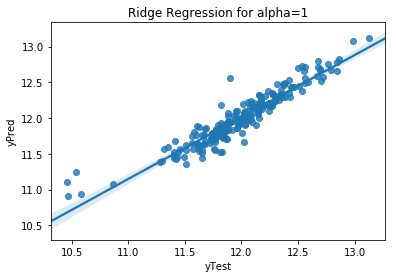




RMSE = 0.14390291749102876
r^2  = 0.876481206672745


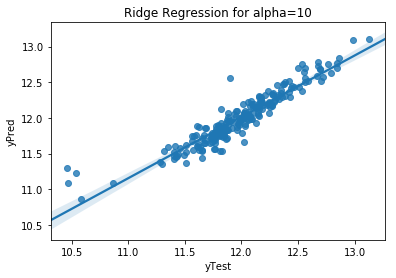




RMSE = 0.1445290956420106
r^2  = 0.8754039102604968


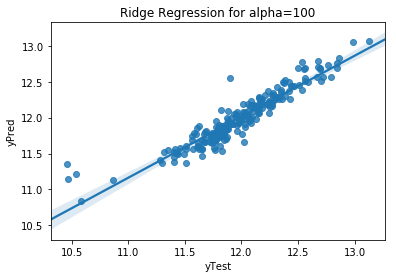




RMSE = 0.15202949616372702
r^2  = 0.8621364190484658


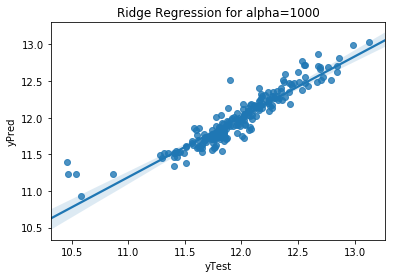




Cycle Number: 3
RMSE = 0.13408126870532872
r^2  = 0.8919255145122778


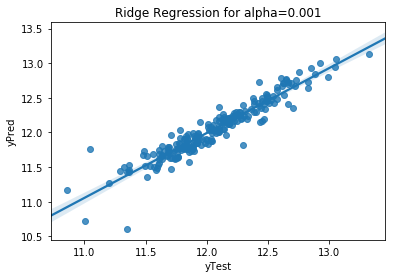




RMSE = 0.1339396301660625
r^2  = 0.8921537257644031


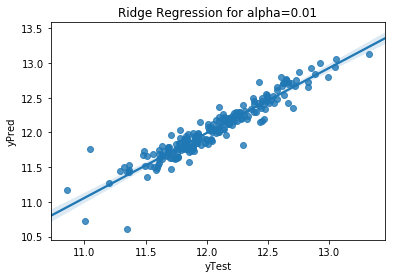




RMSE = 0.13277868740329254
r^2  = 0.8940151724708401


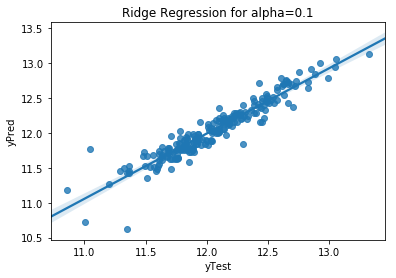




RMSE = 0.12762761151109708
r^2  = 0.9020789101041634


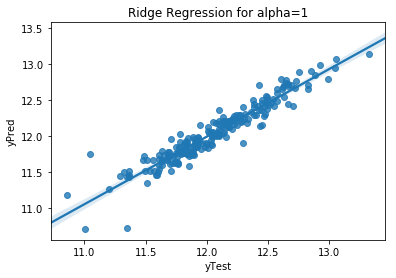




RMSE = 0.12249095456416148
r^2  = 0.9098023975987903


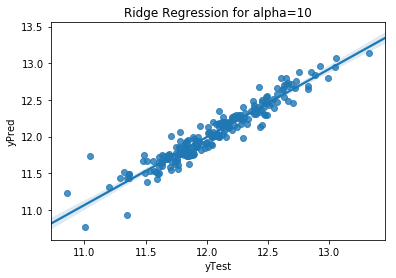




RMSE = 0.12199431997594874
r^2  = 0.9105323198861701


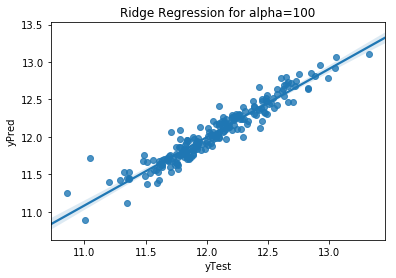




RMSE = 0.13439105581401
r^2  = 0.8914255377502199


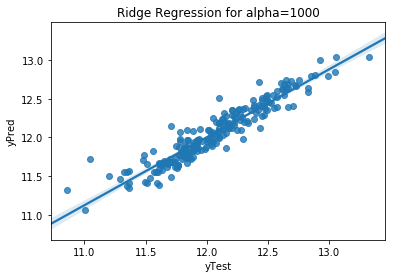




Cycle Number: 4
RMSE = 0.12011380008323193
r^2  = 0.90722198381744


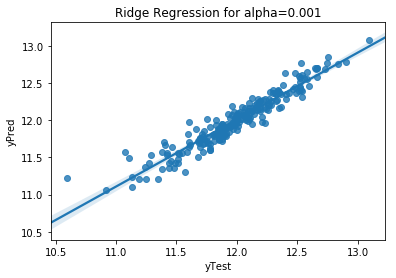




RMSE = 0.12011783921970992
r^2  = 0.9072157439121151


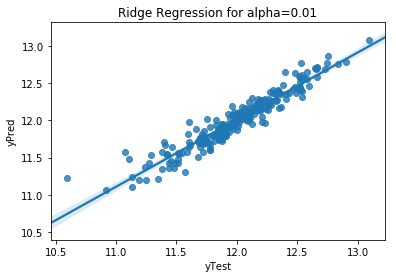




RMSE = 0.12021244556539386
r^2  = 0.9070695302225097


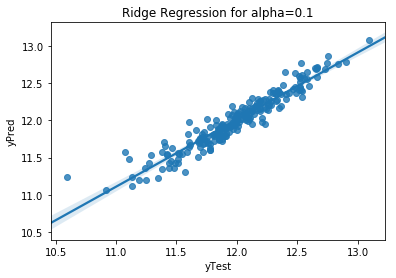




RMSE = 0.12227263813000797
r^2  = 0.9038569638309313


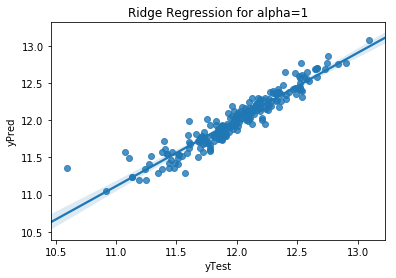




RMSE = 0.12498329192182325
r^2  = 0.8995469363769467


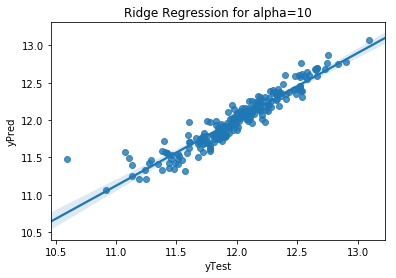




RMSE = 0.12255304877381253
r^2  = 0.903415484125625


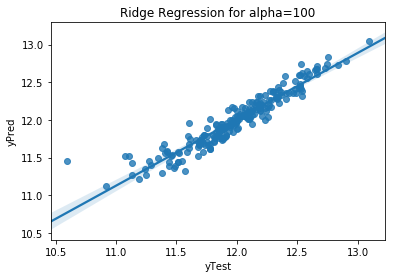




RMSE = 0.13284785128016915
r^2  = 0.8865071932358378


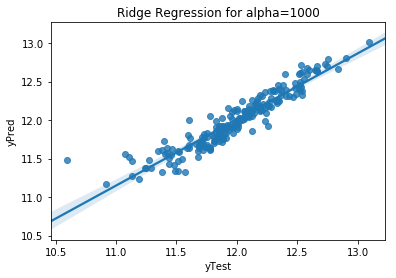




Cycle Number: 5
RMSE = 0.12362141469219316
r^2  = 0.8960300309219398


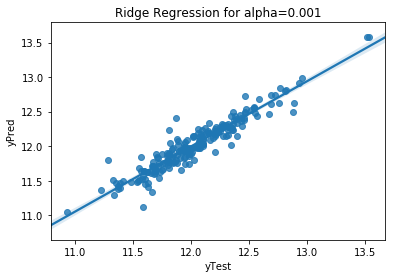




RMSE = 0.12346626379146797
r^2  = 0.8962908419112623


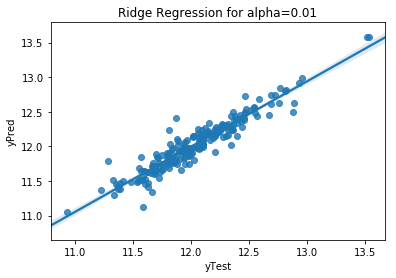




RMSE = 0.12206658943061553
r^2  = 0.898628909783394


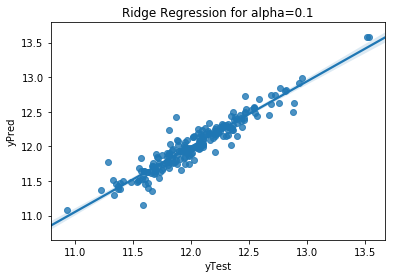




RMSE = 0.1158593344883691
r^2  = 0.9086764983652418


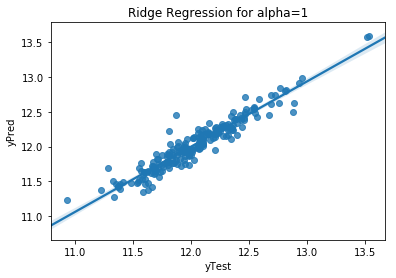




RMSE = 0.11348388394552479
r^2  = 0.9123828992588116


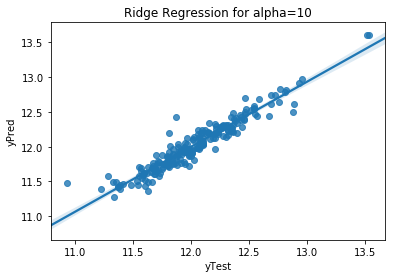




RMSE = 0.11741526979043874
r^2  = 0.9062071663213784


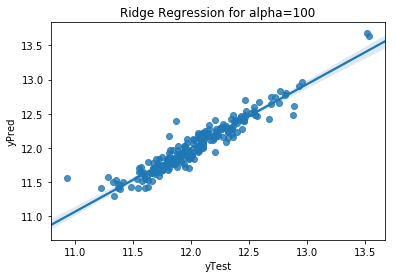




RMSE = 0.13100739595653274
r^2  = 0.8832351502625907


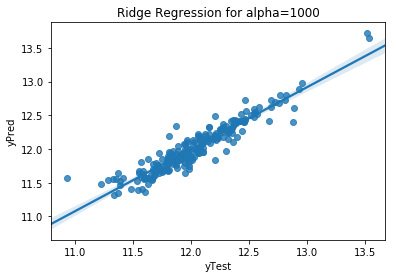

In [19]:
#Ridge Regression
i=0
for train_index, test_index in kf.split(xData):
    print('Cycle Number:',i+1)
    xTrain=xData.iloc[train_index]
    xTest=xData.iloc[test_index]
    yTrain=yData.iloc[train_index]
    yTest=yData.iloc[test_index]
    ridgeregression(xTrain,xTest,yTrain,yTest)
    i+=1
    

Cycle Number: 6
RMSE =  0.11164742793558317
r^2 score= 0.9208337616659313


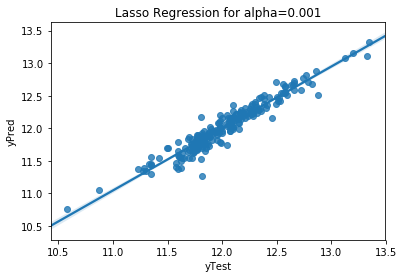

RMSE =  0.12185628256677887
r^2 score= 0.9056941975929858


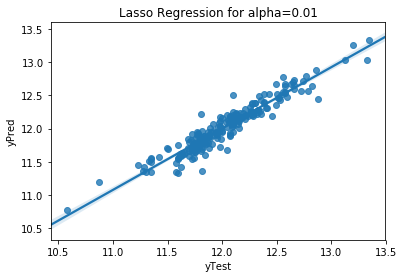

RMSE =  0.1519966488353276
r^2 score= 0.8532728134253397


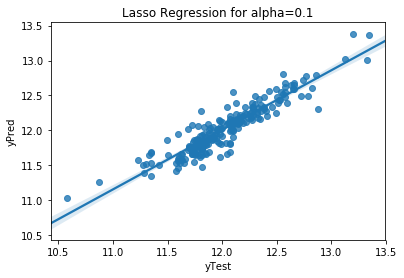

RMSE =  0.15761575244130177
r^2 score= 0.842223686770055


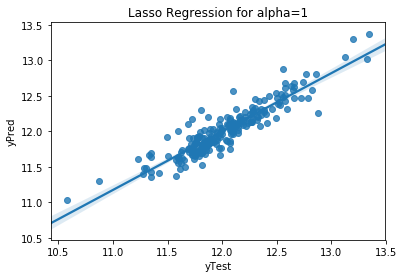

RMSE =  0.18784561296351018
r^2 score= 0.7758985440724462


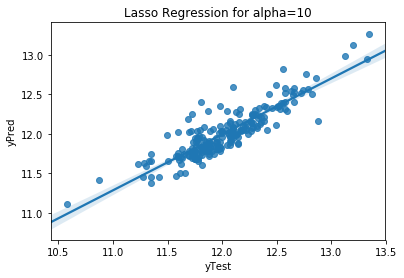

RMSE =  0.32224310811694956
r^2 score= 0.3405075318153905


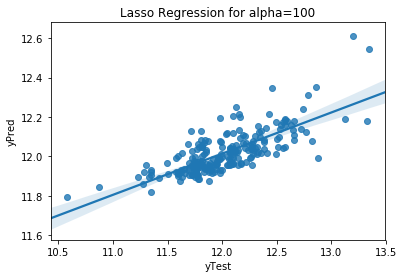

RMSE =  0.3949557295387649
r^2 score= 0.009306299878639845


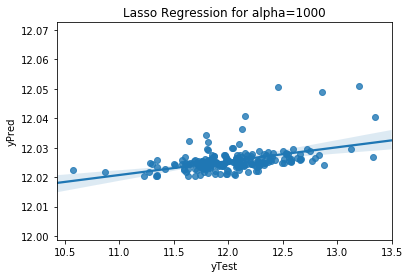

Cycle Number: 7
RMSE =  0.11493992564206669
r^2 score= 0.9159258127588997


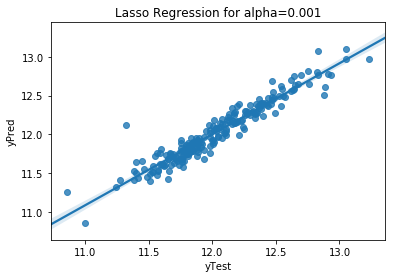

RMSE =  0.12352972620535134
r^2 score= 0.9028900318667286


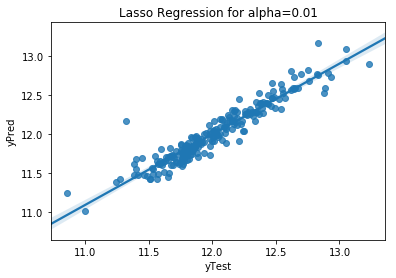

RMSE =  0.14712780058409902
r^2 score= 0.8622440584685019


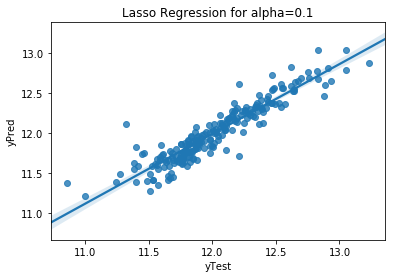

RMSE =  0.15772887089249868
r^2 score= 0.8416772798973435


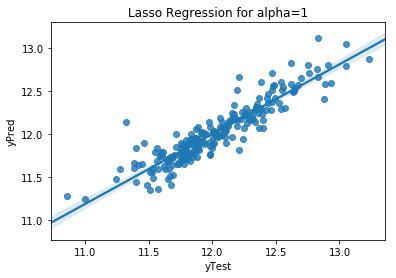

RMSE =  0.19751588215483848
r^2 score= 0.7517296254240057


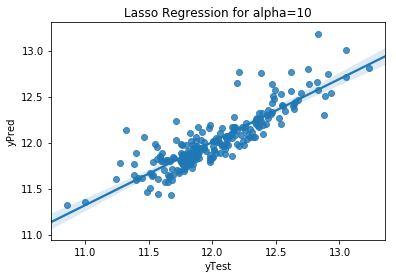

RMSE =  0.35046429082829506
r^2 score= 0.2183570743453187


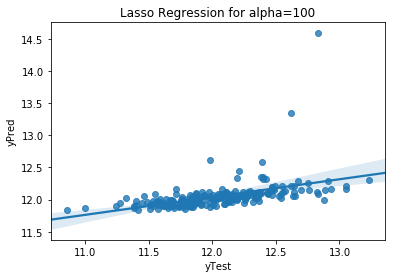

RMSE =  0.396405641751191
r^2 score= -1.1688755325867106e-06


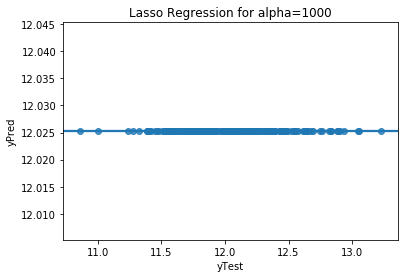

Cycle Number: 8
RMSE =  0.147188392490385
r^2 score= 0.8810046160588011


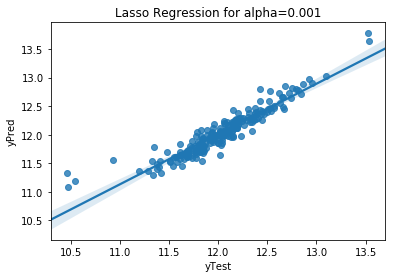

RMSE =  0.15600245751196626
r^2 score= 0.8663263305560618


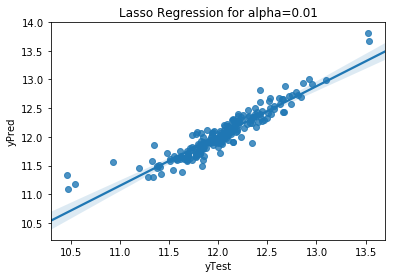

RMSE =  0.1869477129167896
r^2 score= 0.8080344475366


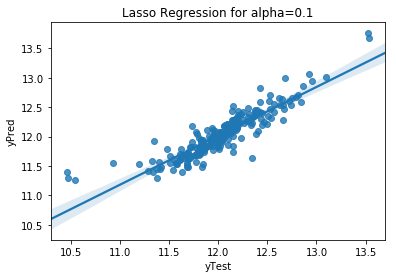

RMSE =  0.1900806962688212
r^2 score= 0.8015463831218493


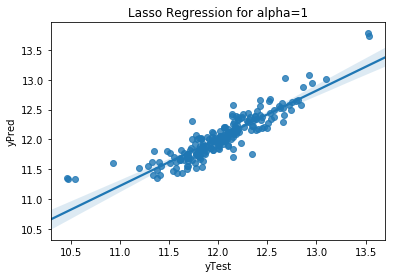

RMSE =  0.21370502370366945
r^2 score= 0.7491509542601232


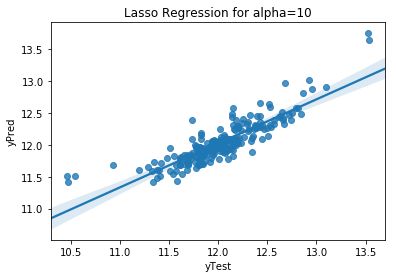

RMSE =  0.3625096926470911
r^2 score= 0.2781910939104252


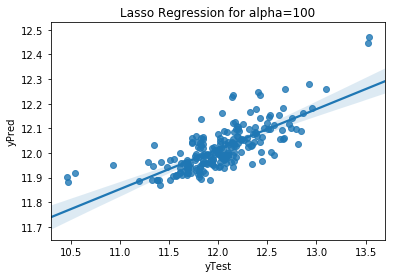

RMSE =  0.42396538416900037
r^2 score= 0.01271216023692845


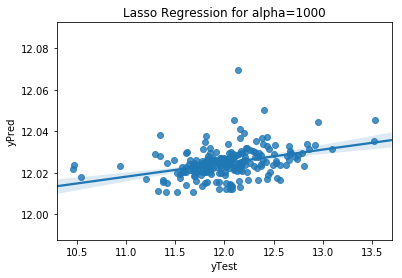

Cycle Number: 9
RMSE =  0.1308872243555518
r^2 score= 0.903317998229332


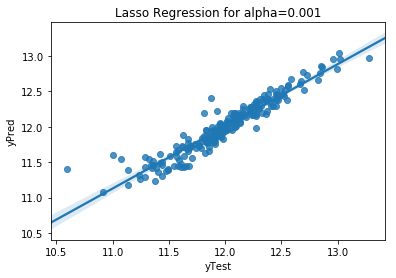

RMSE =  0.13963155595288515
r^2 score= 0.8899681860144628


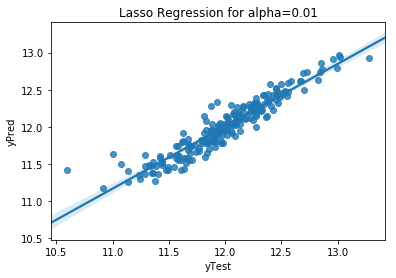

RMSE =  0.17741791990522676
r^2 score= 0.8223578241077514


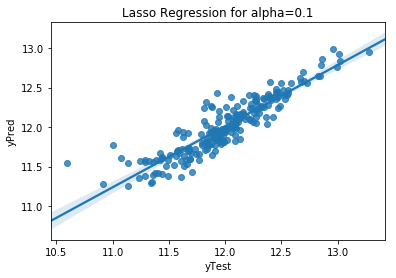

RMSE =  0.19440472846807122
r^2 score= 0.7867128133526807


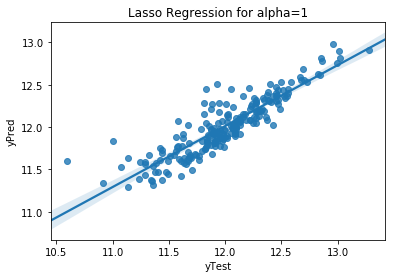

RMSE =  0.23939021676715103
r^2 score= 0.6765822035812274


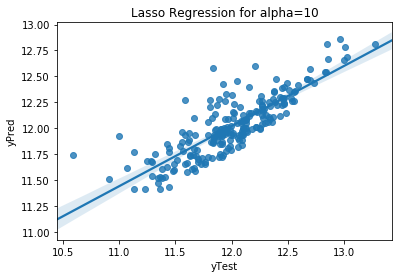

RMSE =  0.3635577758480386
r^2 score= 0.2540701383837175


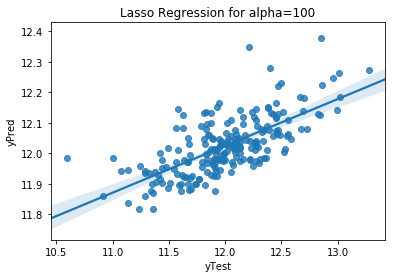

RMSE =  0.41962871358114023
r^2 score= 0.006239997338704062


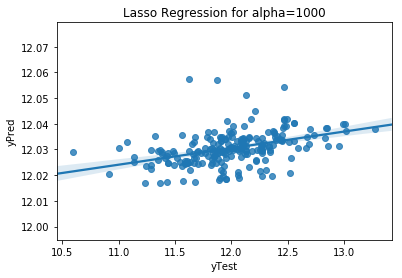

Cycle Number: 10
RMSE =  0.13166224065127724
r^2 score= 0.8846401029802038


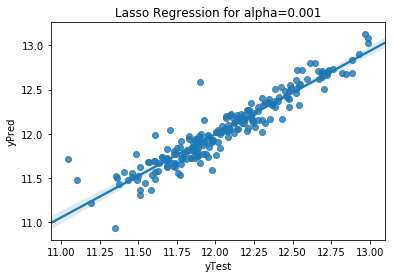

RMSE =  0.13723847571081238
r^2 score= 0.8746615996157175


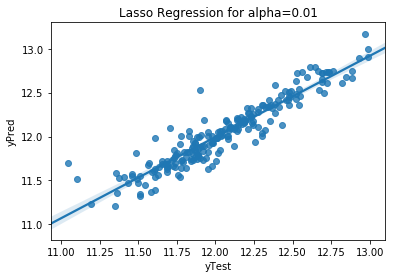

RMSE =  0.1592896789241665
r^2 score= 0.8311474397808688


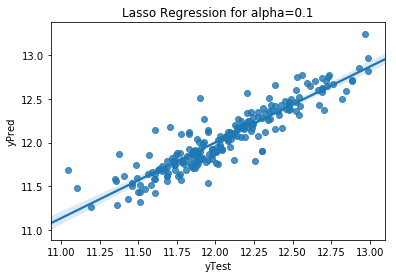

RMSE =  0.17684928282160056
r^2 score= 0.7918679402603033


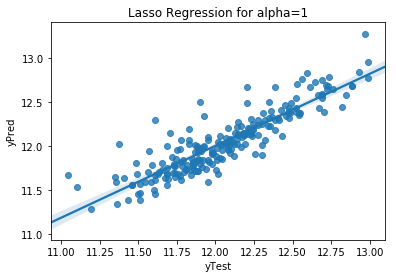

RMSE =  0.21396199197018526
r^2 score= 0.6953468722346157


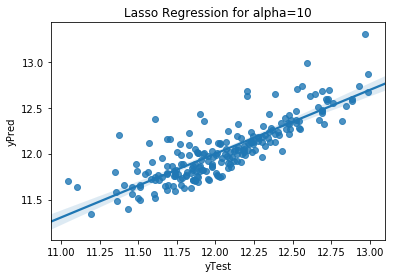

RMSE =  0.3294811626768085
r^2 score= 0.27757368696310514


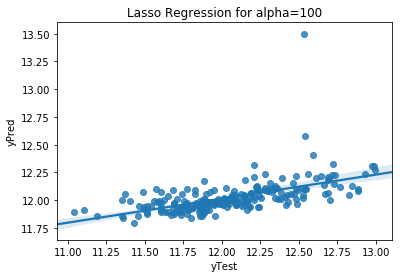

RMSE =  0.38649122480899406
r^2 score= 0.005942166881284572


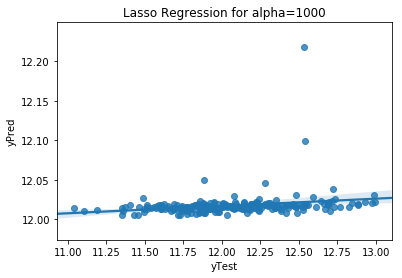

In [20]:
#Lasso Regression
for train_index, test_index in kf.split(xData):
    print('Cycle Number:',i+1)
    xTrain=xData.iloc[train_index]
    xTest=xData.iloc[test_index]
    yTrain=yData.iloc[train_index]
    yTest=yData.iloc[test_index]
    lassoregression(xTrain,xTest,yTrain,yTest)
    i+=1
    

# 3. Gradient Boosting

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

model=GradientBoostingRegressor()

In [22]:
xTrain,xTest,yTrain,yTest=train_test_split(xData,yData)

In [23]:
print(xTrain.shape)
print(xTest.shape)

(816, 135)
(272, 135)


In [24]:
model.fit(xTrain,yTrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [25]:
yPred=model.predict(xTest)

In [26]:
# Metric with all features
from sklearn.metrics import mean_squared_error
print(mean_squared_error(yTest,yPred))

0.018276139795248753


In [27]:
# Considering only important features
predictors=list(xTrain)
feat_imp = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False)

In [28]:
feat_imp.count()

135

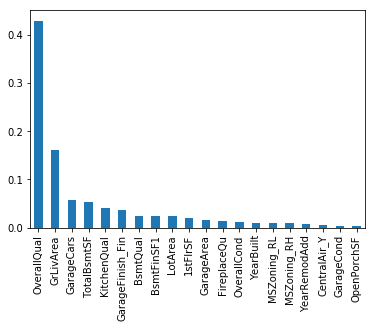

In [29]:
feat_imp.iloc[0:20].plot(kind='bar')

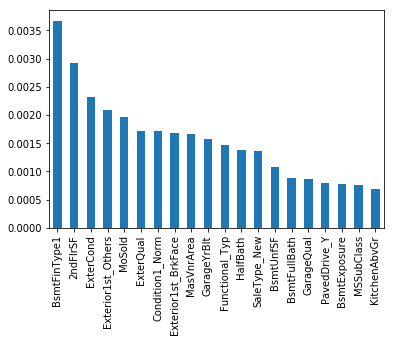

In [30]:
feat_imp.iloc[20:40].plot(kind='bar')

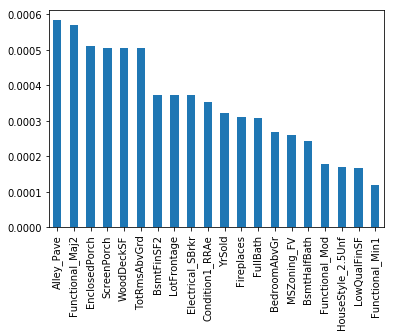

In [31]:
feat_imp.iloc[40:60].plot(kind='bar')

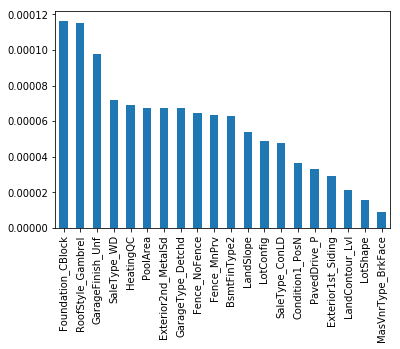

In [32]:
feat_imp.iloc[60:80].plot(kind='bar')

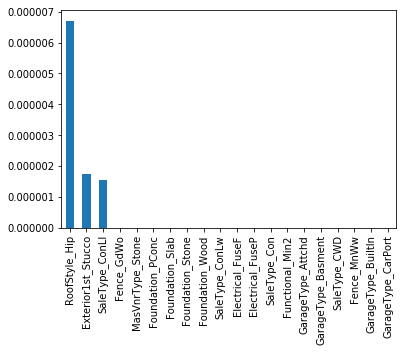

In [33]:
feat_imp.iloc[80:100].plot(kind='bar')

In [34]:
feat_imp.index

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'KitchenQual',
       'GarageFinish_Fin', 'BsmtQual', 'BsmtFinSF1', 'LotArea', '1stFlrSF',
       ...
       '3SsnPorch', 'Exterior1st_Plywood', 'Exterior1st_VinylSd',
       'Exterior1st_WdShing', 'Exterior2nd_HdBoard', 'Exterior2nd_Other',
       'Exterior2nd_Plywood', 'BldgType_TwnhsE', 'Exterior2nd_VinylSd',
       'BldgType_2fmCon'],
      dtype='object', length=135)

In [35]:
def importantFeatures(data,imp):
    for col in data.columns:
        if col not in imp:
            data.drop(columns=[col],axis=1,inplace=True)

In [36]:
xTrain_temp=pd.DataFrame(xTrain)
xTest_temp=pd.DataFrame(xTest)

#### Top 40 features

In [37]:
importantFeatures(xTrain_temp,list(feat_imp.iloc[0:41].index))
importantFeatures(xTest_temp,list(feat_imp.iloc[0:41].index))

In [38]:
model.fit(xTrain_temp,yTrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
#Rmse for top 40 features
yPred=model.predict(xTest_temp)
print(mean_squared_error(yTest,yPred))

0.01837854466362042


#### Rmse for top 30 features

In [40]:
xTrain_temp=pd.DataFrame(xTrain)
xTest_temp=pd.DataFrame(xTest)

In [41]:
importantFeatures(xTrain_temp,list(feat_imp.iloc[0:31].index))
importantFeatures(xTest_temp,list(feat_imp.iloc[0:31].index))

In [42]:
model.fit(xTrain_temp,yTrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [43]:
#Rmse for top 30 features
yPred=model.predict(xTest_temp)
print(mean_squared_error(yTest,yPred))

0.01797748048562054


#### RMSE for top 20 features

In [44]:
xTrain_temp=pd.DataFrame(xTrain)
xTest_temp=pd.DataFrame(xTest)

In [45]:
importantFeatures(xTrain_temp,list(feat_imp.iloc[0:21].index))
importantFeatures(xTest_temp,list(feat_imp.iloc[0:21].index))

In [46]:
model.fit(xTrain_temp,yTrain)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [47]:
#Rmse for top 20 features
yPred=model.predict(xTest_temp)
print(mean_squared_error(yTest,yPred))

0.016775516043835627


In [48]:
# So we choose top 30 features

### Tunning of n_estimators and learning rate

In [49]:
from sklearn.model_selection import GridSearchCV

In [50]:
paramGrid = {'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001],
             'n_estimators':[100,250,500,750,1000,1250,1500,1750]}

In [51]:
tuning=GridSearchCV(estimator =GradientBoostingRegressor(),
                      param_grid = paramGrid, 
                      n_jobs=-1, 
                      cv=5) 

In [52]:
tuning.fit(xTrain,yTrain)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'learning_rate': [0.15, 0.1, 0.05, 0.01, 0.005, 0.001], 'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500, 1750]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
tuning.best_params_

{'learning_rate': 0.01, 'n_estimators': 1500}

In [54]:
tuning.best_score_

0.8862370648098586

## Decision Tree

In [55]:
from sklearn.tree import DecisionTreeRegressor

In [56]:
model=DecisionTreeRegressor()
model.fit(xTrain,yTrain)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [57]:
yPred=model.predict(xTest)

In [58]:
mean_squared_error(yTest,yPred)

0.05147176940769436

In [59]:
from sklearn.model_selection import cross_val_score

In [60]:
#Gives the score of 10 sets of training and testing data
score=cross_val_score(model,xTrain, yTrain, cv=3)
score

array([0.59710278, 0.57202408, 0.64280778])

In [61]:
#Taking mean and std of score
print('mean score',score.mean())
print('std score',score.std())

mean score 0.6039782145319462
std score 0.029303435680531318


In [62]:
from sklearn.model_selection import cross_validate

### Cross Validiation : Decision Tree

In [63]:
cross_validate(model,xData,yData,cv=3,return_train_score=True)

{'fit_time': array([0.01695275, 0.01595712, 0.01695609]),
 'score_time': array([0.00099897, 0.00099754, 0.00199533]),
 'test_score': array([0.73419783, 0.74300884, 0.6557305 ]),
 'train_score': array([0.99999999, 0.99999999, 1.        ])}

### GridSearchCV : Decision Tree

In [64]:
import sklearn

In [65]:
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [66]:
paramGrid={'max_depth':list(range(1,20)),
           'min_samples_split':list(range(2,8)),
           'min_samples_leaf':[1],
           'max_leaf_nodes':[100,200,300,400]
          }

In [67]:
tuning=GridSearchCV(estimator=model,
                   param_grid=paramGrid,
                   n_jobs=-1,
                   cv=3
                   )

In [68]:
tuning.fit(xTrain,yTrain)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19], 'min_samples_split': [2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1], 'max_leaf_nodes': [100, 200, 300, 400]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [69]:
tuning.best_params_

{'max_depth': 4,
 'max_leaf_nodes': 400,
 'min_samples_leaf': 1,
 'min_samples_split': 7}

In [70]:
yPred=tuning.predict(xTest)

In [71]:
mean_squared_error(yTest,yPred)

0.053555987073411394

In [72]:
model=DecisionTreeRegressor(max_depth=10,max_leaf_nodes=300,min_samples_leaf=1,min_samples_split=3)

In [73]:
model.fit(xTrain,yTrain)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=None,
           max_leaf_nodes=300, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [74]:
model.score(xTest,yTest)

0.7250683410357567

## Random Forest

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
model=RandomForestRegressor(n_estimators=100)
model.fit(xTrain,yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [77]:
yPred=model.predict(xTest)

In [78]:
model.score(xTest,yTest)

0.882888982352486

In [79]:
mean_squared_error(yTest,yPred)

0.02187045830852398

#### Feature Importance

In [80]:
xTrain.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       ...
       'Fence_MnWw', 'Fence_NoFence', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleType_WD'],
      dtype='object', length=135)

In [81]:
feat_imp = pd.Series(model.feature_importances_,index=xTrain.columns).sort_values(ascending=False)
feat_imp

OverallQual            5.295838e-01
GrLivArea              9.222201e-02
GarageCars             5.749126e-02
TotalBsmtSF            4.051669e-02
GarageArea             3.816676e-02
BsmtFinSF1             3.301607e-02
1stFlrSF               3.007720e-02
LotArea                1.453951e-02
MSZoning_RH            1.217289e-02
YearBuilt              1.206050e-02
OverallCond            8.335188e-03
BsmtQual               7.213222e-03
YearRemodAdd           7.019183e-03
BsmtUnfSF              6.524756e-03
OpenPorchSF            6.178397e-03
FireplaceQu            5.702317e-03
GarageYrBlt            5.449354e-03
MoSold                 5.327398e-03
2ndFlrSF               5.017518e-03
LotFrontage            4.401860e-03
GarageFinish_Fin       3.789547e-03
MasVnrArea             3.673449e-03
MSSubClass             3.387752e-03
KitchenQual            3.021645e-03
TotRmsAbvGrd           2.949312e-03
Fireplaces             2.859651e-03
WoodDeckSF             2.795306e-03
ExterCond              2.776

#### Top 40 features

In [82]:
xTrain_temp=pd.DataFrame(xTrain)
xTest_temp=pd.DataFrame(xTest)

In [83]:
importantFeatures(xTrain_temp,feat_imp.iloc[0:41])
importantFeatures(xTest_temp,feat_imp.iloc[0:41])

In [84]:
model=RandomForestRegressor(n_estimators=100)

model.fit(xTrain_temp,yTrain)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [85]:
yPred=model.predict(xTest_temp)

In [86]:
mean_squared_error(yTest,yPred)

0.02080494733353874

In [87]:
model.score(xTest_temp,yTest)

0.888594536064933

#### Top 30 features

In [88]:
importantFeatures(xTrain_temp,feat_imp.iloc[0:31])
importantFeatures(xTest_temp,feat_imp.iloc[0:31])

In [89]:
model=RandomForestRegressor(n_estimators=100)

In [90]:
model.fit(xTrain_temp,yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [91]:
yPred=model.predict(xTest_temp)

In [92]:
mean_squared_error(yTest,yPred)

0.021783076988848477

In [93]:
model.score(xTest_temp,yTest)

0.8833568881972662

#### Top 20 features

In [94]:
importantFeatures(xTrain_temp,feat_imp.iloc[0:21])
importantFeatures(xTest_temp,feat_imp.iloc[0:21])

In [95]:
model=RandomForestRegressor(n_estimators=100)

In [96]:
model.fit(xTrain_temp,yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [97]:
yPred=model.predict(xTest_temp)

In [98]:
mean_squared_error(yTest,yPred)

0.020867816760494384

In [99]:
model.score(xTest_temp,yTest)

0.8882578854805773

#### Top 15 features

In [100]:
importantFeatures(xTrain_temp,feat_imp.iloc[0:16])
importantFeatures(xTest_temp,feat_imp.iloc[0:16])

In [101]:
model=RandomForestRegressor(n_estimators=100)

In [102]:
model.fit(xTrain_temp,yTrain)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [103]:
yPred=model.predict(xTest_temp)

In [104]:
mean_squared_error(yTest,yPred)

0.020752638721670574

In [105]:
# So we will choose Top 20 features

#### Cross Validiatin

In [106]:
cross_validate(model,xData,yData,cv=3,return_train_score=True)

{'fit_time': array([0.97328639, 0.94509959, 0.972826  ]),
 'score_time': array([0.00997448, 0.00997305, 0.01199889]),
 'test_score': array([0.86075629, 0.89592673, 0.84134162]),
 'train_score': array([0.98186942, 0.9794734 , 0.98049517])}

# XgBoost

In [107]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [108]:
import xgboost as xgb

In [109]:
data_dmatrix = xgb.DMatrix(xData,label=yData)

C:\Users\vaibhavgupta02\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [110]:
model = xgb.XGBRegressor(learning_rate = 0.1, gamma=0.005, n_estimators = 100)

In [111]:
model.fit(xTrain,yTrain)

[09:59:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.005,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [112]:
yPred=model.predict(xTest)

In [113]:
np.sqrt(mean_squared_error(yTest,yPred))
#0.12357012343824604

0.13811619347911408

### Cross Validiation : XgBoost

In [114]:
params = {'learning_rate': 0.1,'max_depth': 10,'gamma':0.005}
cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=params, 
                    nfold=5,
                    num_boost_round=200,
                    early_stopping_rounds=20,
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=123)

In [115]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,10.382101,0.003870,10.382120,0.017603
1,9.346760,0.003495,9.346777,0.018003
2,8.415019,0.003158,8.415034,0.018369
3,7.576551,0.002855,7.576566,0.018702
4,6.821894,0.002579,6.821911,0.018733
5,6.142666,0.002331,6.142679,0.018801
6,5.531337,0.002106,5.531646,0.019212
7,4.981086,0.001901,4.981313,0.018638
8,4.485861,0.001723,4.486135,0.018591
9,4.040168,0.001548,4.039854,0.018787


### Tree Plotting

In [116]:
#model = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=100)

In [117]:
#!pip install graphviz

In [118]:
#xgb.plot_tree(model,num_trees=0)
#plt.rcParams['figure.figsize'] = [50, 10]
#plt.show()

### Feature importance

In [119]:
from xgboost import plot_importance

In [120]:
model = xgb.XGBRegressor(learning_rate = 0.1, gamma=0.005, n_estimators = 100)

In [121]:
model.fit(xTrain,yTrain)

C:\Users\vaibhavgupta02\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[09:59:46] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.005,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

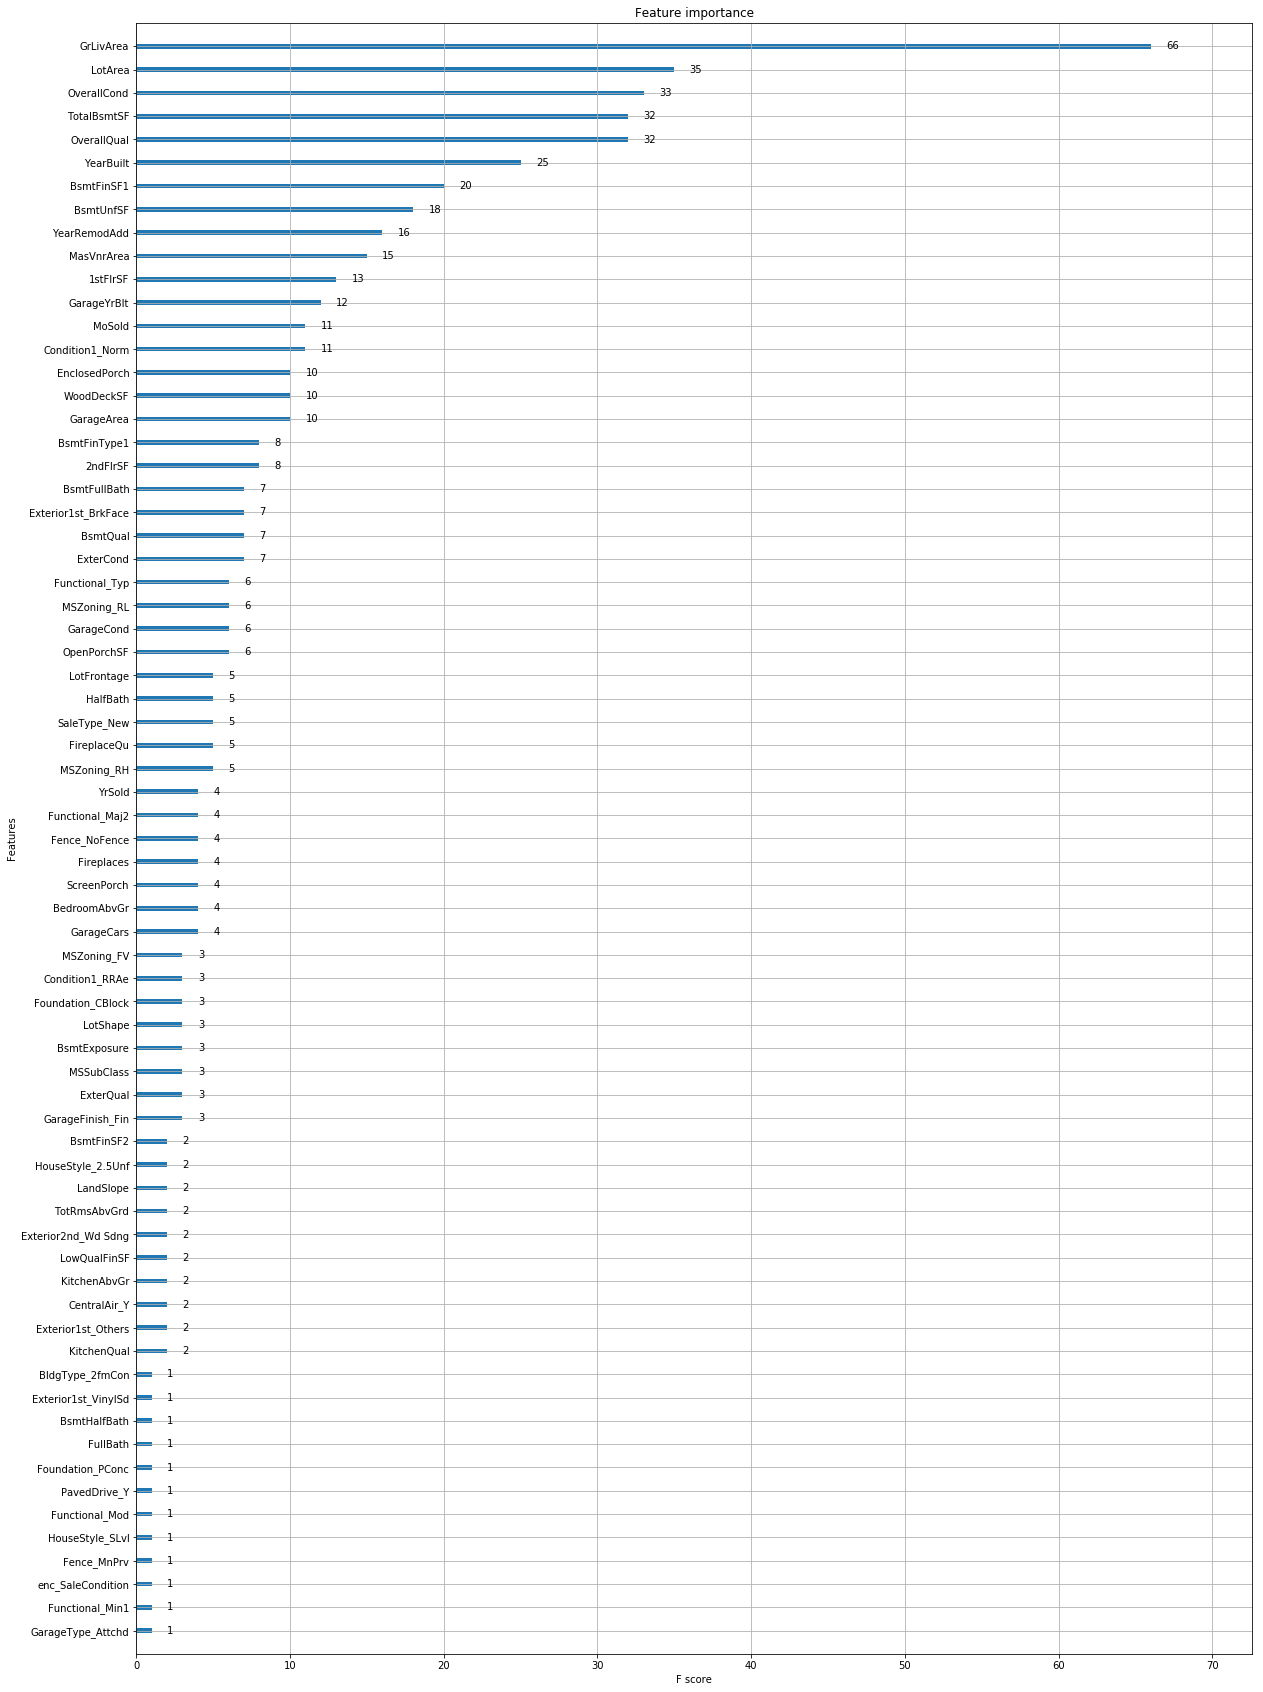

In [122]:
fig=plt.figure(figsize=(20,30))
ax1=fig.add_subplot(1,1,1)
plot_importance(model,ax=ax1)

In [123]:
feat_imp=pd.Series(model.get_booster().get_score(importance_type= 'weight'))
feat_imp=feat_imp.sort_values(ascending=False)

In [124]:
feat_imp

GrLivArea              66
LotArea                35
OverallCond            33
OverallQual            32
TotalBsmtSF            32
YearBuilt              25
BsmtFinSF1             20
BsmtUnfSF              18
YearRemodAdd           16
MasVnrArea             15
1stFlrSF               13
GarageYrBlt            12
MoSold                 11
Condition1_Norm        11
GarageArea             10
EnclosedPorch          10
WoodDeckSF             10
BsmtFinType1            8
2ndFlrSF                8
BsmtFullBath            7
Exterior1st_BrkFace     7
ExterCond               7
BsmtQual                7
Functional_Typ          6
GarageCond              6
OpenPorchSF             6
MSZoning_RL             6
LotFrontage             5
SaleType_New            5
MSZoning_RH             5
                       ..
GarageFinish_Fin        3
MSSubClass              3
BsmtExposure            3
Condition1_RRAe         3
LotShape                3
MSZoning_FV             3
Foundation_CBlock       3
ExterQual   

In [125]:
len(feat_imp)

69

#### Top 40 features

In [126]:
model = xgb.XGBRegressor(learning_rate = 0.1, gamma=0.005, n_estimators = 100)

In [127]:
xTrain_temp=pd.DataFrame(xTrain)
xTest_temp=pd.DataFrame(xTest)

In [128]:
importantFeatures(xTrain_temp,feat_imp.iloc[0:40])
importantFeatures(xTest_temp,feat_imp.iloc[0:40])

In [129]:
print(xTrain_temp.shape)
print(xTrain.shape)

(816, 40)
(816, 135)


In [130]:
model.fit(xTrain_temp,yTrain)

[09:59:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.005,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [131]:
yPred=model.predict(xTest_temp)

In [132]:
np.sqrt(mean_squared_error(yTest,yPred))

0.14068143095658914

#### Top 20 features

In [133]:
model = xgb.XGBRegressor(learning_rate = 0.1, gamma=0.005, n_estimators = 100)

In [134]:
xTrain_temp=pd.DataFrame(xTrain)
xTest_temp=pd.DataFrame(xTest)

In [135]:
importantFeatures(xTrain_temp,feat_imp.iloc[0:20])
importantFeatures(xTest_temp,feat_imp.iloc[0:20])

In [136]:
print(xTrain_temp.shape)
print(xTrain.shape)

(816, 20)
(816, 135)


In [137]:
model.fit(xTrain_temp,yTrain)

[09:59:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\vaibhavgupta02\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.005,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [138]:
yPred=model.predict(xTest_temp)

In [139]:
np.sqrt(mean_squared_error(yTest,yPred))

0.14290076738290872

#### Top 30 features

In [311]:
model = xgb.XGBRegressor(learning_rate = 0.1, gamma=0.005, n_estimators = 100)

In [312]:
xTrain_temp=pd.DataFrame(xTrain)
xTest_temp=pd.DataFrame(xTest)

In [142]:
importantFeatures(xTrain_temp,feat_imp.iloc[0:30])
importantFeatures(xTest_temp,feat_imp.iloc[0:30])

In [143]:
print(xTrain_temp.shape)
print(xTrain.shape)

(816, 30)
(816, 135)


In [144]:
model.fit(xTrain_temp,yTrain)

[09:59:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\vaibhavgupta02\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0.005,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [156]:
yPred=model.predict(xTest_temp)

In [157]:
np.sqrt(mean_squared_error(yTest,yPred))
#0.12357012343824604

0.1425828518237417

# Annova Model

In [632]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


In [633]:
selector = SelectKBest(f_classif, k=10)
selector.fit(xData, yData)
# Get columns to keep
cols = selector.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
impFeaturesAnova =list(xData.columns[cols])


C:\Users\vaibhavgupta02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:114: UserWarning: Features [106 128] are constant.
  UserWarning)
C:\Users\vaibhavgupta02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\feature_selection\univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [634]:
impFeaturesAnova

['LotArea',
 'OverallQual',
 'ExterQual',
 'BsmtQual',
 'GrLivArea',
 'KitchenQual',
 'enc_SaleCondition',
 'Exterior1st_CemntBd',
 'SaleType_New',
 'SaleType_Oth']

In [637]:
len(impFeaturesAnova)

10

# XgBoost vs ANOVA

In [643]:
impFeatureXgboost=list(feat_imp.iloc[0:30].index)

In [644]:
print(len(impFeaturesAnova))
print(len(impFeatureXgboost))

10
30


In [750]:
additional_features=[]

In [751]:
#Present in Anova but not in Xgboost
count=0
for feature in impFeaturesAnova:
    if feature not in impFeatureXgboost:
        print(feature)
        additional_features.append(feature)
        count+=1
    
print('count = ',count)

ExterQual
KitchenQual
enc_SaleCondition
Exterior1st_CemntBd
SaleType_Oth
count =  5


In [752]:
count=0
for feature in impFeatureXgboost:
    if feature not in impFeaturesAnova:
        print(feature)
        count+=1
print('count = ',count)

OverallCond
TotalBsmtSF
YearBuilt
BsmtFinSF1
BsmtUnfSF
YearRemodAdd
MasVnrArea
1stFlrSF
GarageYrBlt
MoSold
Condition1_Norm
GarageArea
EnclosedPorch
WoodDeckSF
BsmtFinType1
2ndFlrSF
BsmtFullBath
Exterior1st_BrkFace
ExterCond
Functional_Typ
GarageCond
OpenPorchSF
MSZoning_RL
LotFrontage
MSZoning_RH
count =  25


In [753]:
additional_features

['ExterQual',
 'KitchenQual',
 'enc_SaleCondition',
 'Exterior1st_CemntBd',
 'SaleType_Oth']

## On UnseenData

In [948]:
model = xgb.XGBRegressor(learning_rate = 0.09, 
                         gamma=0, 
                         n_estimators = 155,
                         max_depth=3,
                         min_child_weight=4)

In [949]:
xTrain_temp=pd.DataFrame(xTrain)
xUnseenData_temp=pd.DataFrame(xUnseenData)

In [950]:
final_features=[]

In [951]:
#final_features=list(additional_features)

In [952]:
final_features.extend(feat_imp.iloc[0:69].index)

In [953]:
len(final_features)

69

In [954]:
importantFeatures(xTrain_temp,final_features)
importantFeatures(xUnseenData_temp,final_features)

In [955]:
model.fit(xTrain_temp,yTrain)

C:\Users\vaibhavgupta02\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[23:34:23] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.09, max_delta_step=0,
       max_depth=3, min_child_weight=4, missing=None, n_estimators=155,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [956]:
yPred=model.predict(xUnseenData_temp)

In [957]:
np.sqrt(mean_squared_error(yUnseenData,yPred))

0.10824817929118044

In [798]:
"""
params={'learning_rate':0.3,
        'n_estimators':500,
        'max_depth':6,
        'min_child_weight':1,
        'gamma':0,
        'subsample':0.8,
        'colsample_bytree':0.8,
        'nthread':4,
        'scale_pos_weight':1,
        'seed':27}
"""

"\nparams={'learning_rate':0.3,\n        'n_estimators':500,\n        'max_depth':6,\n        'min_child_weight':1,\n        'gamma':0,\n        'subsample':0.8,\n        'colsample_bytree':0.8,\n        'nthread':4,\n        'scale_pos_weight':1,\n        'seed':27}\n"

# On Kaggle Test Data

In [980]:
model = xgb.XGBRegressor(learning_rate = 0.09, 
                         gamma=0, 
                         n_estimators = 155,
                         max_depth=3,
                         min_child_weight=4)

In [981]:
xKag_temp=pd.DataFrame(x)

In [982]:
final_features=[]

In [983]:
len(final_features)

0

In [984]:
#final_features=list(additional_features)

In [985]:
final_features.extend(feat_imp.iloc[0:30].index)

In [986]:
len(final_features)

30

In [987]:
importantFeatures(xKag_temp,final_features)

In [988]:
print(xKag_temp.shape)
print(x.shape)
print(y.shape)

(1451, 30)
(1451, 135)
(1451,)


In [989]:
model.fit(xKag_temp,y)

C:\Users\vaibhavgupta02\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10:10:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.09, max_delta_step=0,
       max_depth=3, min_child_weight=4, missing=None, n_estimators=155,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [990]:
KagTestData_temp=pd.DataFrame(KagTestData)

In [991]:
KagTestData_temp.shape

(1459, 134)

In [992]:
for col in KagTestData_temp.columns:
    if col not in KagTestData.columns:
        print(col)

In [994]:
for col in KagTestData_temp.columns:
    if col not in KagTestData.columns:
        print(col)

In [998]:
importantFeatures(KagTestData_temp,final_features)

In [999]:
KagTestData_temp.shape

(1459, 30)

In [1000]:
yPredKaggle=pd.DataFrame(model.predict(KagTestData_temp),columns=['SalePrice'])

In [1001]:
yPredKaggle

,SalePrice
0,11.713335
1,11.993138
2,12.111208
3,12.128929
4,12.140780
5,12.042208
6,12.080420
7,11.990808
8,12.125742
9,11.723258


In [903]:
yPredKaggle=np.exp(yPredKaggle)

In [904]:
ans=pd.concat([ansID,yPredKaggle],axis=1)

In [905]:
ans.index+=1

In [906]:
ans

,Id,SalePrice
1,1461,122190.312500
2,1462,161641.843750
3,1463,181899.203125
4,1464,185151.390625
5,1465,187358.734375
6,1466,169771.328125
7,1467,176384.140625
8,1468,161265.687500
9,1469,184562.234375
10,1470,123408.835938


In [907]:
ans.to_csv(r'C:\Users\vaibhavgupta02\Desktop\Intern\Problem Statment 1\Data\ans.csv',index=None,header=True)

### Tuning of XGboost parameters
1.   Choose a relatively high learning rate. Generally a learning rate of 0.1 works but somewhere between 0.05 to 0.3 should work for different problems. Determine the optimum number of trees for this learning rate. XGBoost has a very useful function called as “cv” which performs cross-validation at each boosting iteration and thus returns the optimum number of trees required.
2. Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees. Note that we can choose different parameters to define a tree and I’ll take up an example here.
3. Tune regularization parameters (lambda, alpha) for xgboost which can help reduce model complexity and enhance performance.
4. Lower the learning rate and decide the optimal parameters 

In [820]:
model = xgb.XGBRegressor(learning_rate = 0.09, gamma=0.005, n_estimators = 155)

In [825]:
params={'learning_rate':[0.1,0.2,0.3,0.09,0.07,0.2],
        'n_estimators':[80,100,120,140,150,155,160,170,180],
        'max_depth':list(range(3,10)),
        'min_child_weight':list(range(0,6)),
        'gamma':[0.005,0.01,0.1,0.2],
        'subsample':[0,0.6,0.7,0.8,0.9,1]}

In [826]:
bestModel=GridSearchCV(n_jobs=-1,
             estimator=model,
             param_grid=params,
             cv=4
            )

In [827]:
print(xTrain_temp.shape)
print(yTrain.shape)

(816, 35)
(816,)


In [829]:
bestModel.fit(xTrain_temp,yTrain)

KeyboardInterrupt: 

In [ ]:
cv_results = xgb.cv(dtrain=data_dmatrix, 
                    params=params, 
                    nfold=5,
                    num_boost_round=200,
                    early_stopping_rounds=20,
                    metrics="rmse", 
                    as_pandas=True, 
                    seed=123)

In [ ]:
cv_results

# Linear reg : 30 features

In [ ]:
linearregression(xTrain_temp,xTest_temp,yTrain,yTest)